<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/forecastingTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
# 1.0 Call libraries
import numpy as np
import matplotlib.pyplot as plt

In [161]:
# 1.1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [162]:
# 1.2 Some constants
n_steps = 50
batch_size = 4

In [163]:
# 1.3 Some points on 'time' axis
time = np.linspace(0,1,50)
time

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

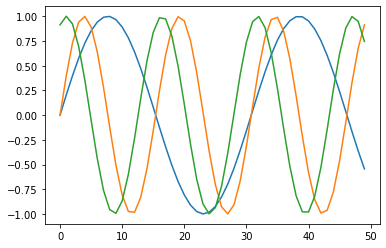

In [164]:
# 2.0 Let us plot sine wave
fig = plt.figure()
_= plt.plot(np.sin(time*10))
_= plt.plot(np.sin(time*10 * 2))        # Freq double of above
_= plt.plot(np.sin(time*10 * 2 + 20))   # Double freq, but displaced by 20 units
#_= plt.plot(np.sin(time*10 * 4))       # Four times of initial freq
plt.show()

In [165]:
# 3.0 Instantiate a random number generator
rng = np.random.default_rng()

In [166]:
# 3.1 Generate 4 sets of 3 X 1 random numbers
#      Assign each set to four variables
freq1, freq2, offsets1, offsets2 = rng.random(size=(4,3,1))
print("\n-------\n")
freq1
print("\n-------\n")
freq2
print("\n-------\n")
offsets1
print("\n-------\n")
offsets2


-------



array([[0.5018373 ],
       [0.71826905],
       [0.9832738 ]])


-------



array([[0.04259845],
       [0.94431954],
       [0.64539191]])


-------



array([[0.45594536],
       [0.54158941],
       [0.76930948]])


-------



array([[0.61846137],
       [0.7840489 ],
       [0.73194196]])

In [167]:
# 3.2 Get three sets of 50 numbers each   
theta1 = time - offsets1  # time gets subtracted 3 times
                          #  by each one of the offsets, in turn 
theta1  
theta1.shape   # (3, 50)

array([[-0.45594536, -0.43553719, -0.41512903, -0.39472087, -0.3743127 ,
        -0.35390454, -0.33349638, -0.31308822, -0.29268005, -0.27227189,
        -0.25186373, -0.23145556, -0.2110474 , -0.19063924, -0.17023107,
        -0.14982291, -0.12941475, -0.10900658, -0.08859842, -0.06819026,
        -0.04778209, -0.02737393, -0.00696577,  0.0134424 ,  0.03385056,
         0.05425872,  0.07466689,  0.09507505,  0.11548321,  0.13589138,
         0.15629954,  0.1767077 ,  0.19711587,  0.21752403,  0.23793219,
         0.25834036,  0.27874852,  0.29915668,  0.31956485,  0.33997301,
         0.36038117,  0.38078934,  0.4011975 ,  0.42160566,  0.44201383,
         0.46242199,  0.48283015,  0.50323832,  0.52364648,  0.54405464],
       [-0.54158941, -0.52118125, -0.50077309, -0.48036492, -0.45995676,
        -0.4395486 , -0.41914043, -0.39873227, -0.37832411, -0.35791594,
        -0.33750778, -0.31709962, -0.29669145, -0.27628329, -0.25587513,
        -0.23546696, -0.2150588 , -0.19465064, -0.

(3, 50)

In [168]:
# 3.3 We create three time series each with 
#      a different frequency
#       For every one of the 3, thetas, 

f1 = freq1 * 10 + 10               # freq1 has three diff values

# 3.3.1
series = 0.5 * np.sin(theta1 * f1) # We have three time series
series.shape

(3, 50)

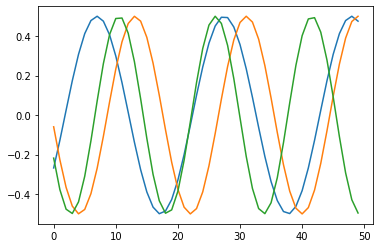

In [169]:
# 3.3.2 Plot the above three series
fig = plt.figure()
_= plt.plot(series[0])
_= plt.plot(series[1])
_= plt.plot(series[2])
plt.show()

In [181]:
# 3.3 Modify the above series.
#     On the earlier time series
#     superimpose another small 
#     sine-wave fluctuations

theta2 = time - offsets2

# 3.4
f2 = freq2 * 20 + 20
series += 0.2 * np.sin(theta2 * f2) # We have three time series
                                    #  Each getting superimposed
                                    #   on earlier
series.shape

(3, 50)

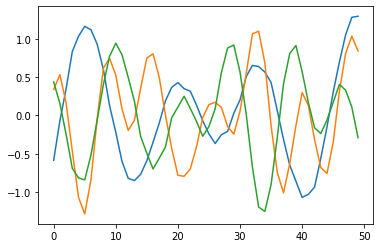

In [182]:
# 4.0 Plot the generated three series
fig = plt.figure()
_= plt.plot(series[0])
_= plt.plot(series[1])
_= plt.plot(series[2])
plt.show()

In [183]:
# 4.1 Add some noise here
series += 0.1 * ((rng.random(size = (3,50))) - 0.5)

[]

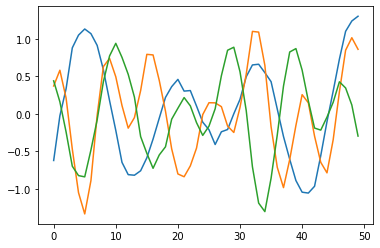

In [184]:
# 4.2 Plot the final series
fig = plt.figure()
_= plt.plot(series[0])
_= plt.plot(series[1])
_= plt.plot(series[2])
plt.plot()

In [185]:
# 4.3 Finally add one axis to series
#     as needed by keras NN

series = series[...,np.newaxis].astype(np.float32)
series.shape

(3, 50, 1)

In [186]:
# 5.0 Write a function to generate time-series:

def generate_time_series(batch_size,n_steps):
  # 5.1
  freq1,freq2,offsets1,offsets2 = rng.random(size = (4,batch_size,1))
  # 5.2
  time = np.linspace(0,1,n_steps)
  # 5.3
  series = 0.5  * np.sin((time - offsets1) * (freq1 * 10 +10))
  # 5.4
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 +20))
  # 5.5
  series += 0.1 * (rng.random(size = (batch_size, n_steps)) - 0.5 )
  # 5.6
  return series[...,np.newaxis].astype(np.float32)


In [187]:
# 6.0 Generate a sample of three series
gt= generate_time_series(3,50)
gt.shape

(3, 50, 1)

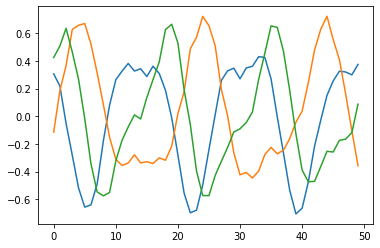

In [188]:
# 6.1 Plot the three generated series
fig = plt.figure()
_= plt.plot(gt[0])
_= plt.plot(gt[1])
_= plt.plot(gt[2])
plt.show()

In [189]:
# 7.0
# Generate now train and test data
# Let batch_size be 10000
# That is we get a batch of 10000 series at a time
# And time-steps are n_steps

n_steps = 50
series = generate_time_series(10000,n_steps +1 )
series.shape                                                    

(10000, 51, 1)

In [190]:
# 7.1 First 7000 series are train data
X_train, y_train = series[:7000, :n_steps], series[:7000,-1]

# 7.2 Next 2000 series are validation data
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000,-1]

# 7.3 Next 1000 series are test data
X_test, y_test = series[9000:, :n_steps], series[9000:,-1]

In [193]:
y_pred = X_valid[:,-1]
y_pred   # for each of 2000 series
y_pred.shape  # (2000,1)
np.mean(keras.losses.mean_squ
        )

array([[-0.5012371 ],
       [-0.40872425],
       [ 0.2720004 ],
       ...,
       [-0.30106443],
       [ 0.31804425],
       [-0.23465335]], dtype=float32)

(2000, 1)